# Metadata

**Topic** - app development practices with Python

**Target Number of Turns (User + Assistant) - 3**

**Suggested Conversation :** - How can Python be used to optimize the energy consumption of an IoT-based smart home application, which aims to reduce the carbon footprint by efficiently managing the usage of electrical appliances?

# Conversation

**User**

How can I use Python to optimize the energy consumption of an IoT-based smart home application that aims to reduce the carbon footprint by efficiently managing the usage of electrical appliances?

**Assistant**

Suppose we want to optimize the energy consumption of an IoT-based smart home application to reduce the carbon footprint by efficiently managing electrical appliance usage. The goal is to create a system that monitors appliance usage and makes decisions to minimize energy consumption without compromising the user's comfort.

Let's review the Python implementation and then explain the steps later:

In [ ]:
# Assistant

import random
import time

class Appliance:
    def __init__(self, name, power_rating):
        self.name = name
        self.power_rating = power_rating
        self.is_on = False

    def turn_on(self):
        self.is_on = True
        print(f"{self.name} is turned on.")

    def turn_off(self):
        self.is_on = False
        print(f"{self.name} is turned off.")

    def get_power_consumption(self):
        return self.power_rating if self.is_on else 0

class SmartHome:
    def __init__(self, appliances):
        self.appliances = appliances

    def get_total_power_consumption(self):
        total_power = sum(appliance.get_power_consumption() for appliance in self.appliances)
        print(f"Total power consumption: {total_power} watts")
        return total_power

    def optimize_energy_consumption(self):
        total_power = self.get_total_power_consumption()
        # Suppose we want to keep consumption under 1000 watts
        if total_power > 1000:
            for appliance in self.appliances:
                if appliance.is_on:
                    appliance.turn_off()
                    total_power -= appliance.get_power_consumption()
                    print(f"Reducing consumption: {total_power} watts left.")
                    if total_power <= 1000:
                        break

# Simulate sensor data and appliance control
def simulate_smart_home():
    # Create some appliances
    fridge = Appliance("Fridge", 150)
    tv = Appliance("TV", 200)
    heater = Appliance("Heater", 1500)
    light = Appliance("Light", 60)

    # Add appliances to smart home
    smart_home = SmartHome([fridge, tv, heater, light])

    # Simulate appliance usage
    for _ in range(10):
        for appliance in smart_home.appliances:
            if random.choice([True, False]):
                appliance.turn_on()
            else:
                appliance.turn_off()

        smart_home.optimize_energy_consumption()
        # Wait for 2 seconds before next cycle
        time.sleep(2)

# Run the simulation
if __name__ == "__main__":
    simulate_smart_home()

**Assistant**

- **Key Components of the Case:**

  - **Problem Context:**
    - We imagine a smart home with various electrical appliances to reduce energy consumption and carbon footprint.
  - **Appliance Class:**
    - This class represents an appliance with attributes like name, power rating, and its on/off state. Methods are included to turn the appliance on or off and to get its power consumption.
  - **Smart Home Class:**
    - This class manages multiple appliances. It includes methods to calculate the total power consumption and to optimize energy usage by turning off appliances if the total consumption exceeds a certain threshold (e.g., 1000 watts).
  - **Simulation Function:**
    - `simulate_smart_home` creates instances of appliances, adds them to the smart home, and simulates their usage over time. It randomly turns appliances on or off and calls the optimization function to manage power consumption.
  - **Energy Optimization Logic:**
    - The smart home monitors the total power usage and systematically turns off appliances to keep the total consumption under a predefined limit, ensuring efficient energy management.

This solution demonstrates a simple yet effective way to manage energy consumption in a smart home environment using Python, laying the groundwork for more complex implementations involving real-time sensor data and advanced decision algorithms.

**User**

Implement a feature that logs each appliance's power consumption over time and visualizes this data using a line chart. Use Python and a visualization library like Matplotlib.

**Assistant**

We want to monitor and visualize the power consumption of each appliance in our smart home over time. This can help users understand their energy usage patterns and make informed decisions to reduce their carbon footprint. We'll use Python to log the power consumption data and `Matplotlib` to create a line chart.

Make sure that the `Matplotlib` library is installed in the terminal:

```bash
pip3 install matplotlib
```

Here's the code to do it:

Fridge is turned off.
TV is turned off.
Heater is turned on.
Light is turned off.
Fridge is turned off.
TV is turned off.
Heater is turned off.
Light is turned on.
Fridge is turned on.
TV is turned on.
Heater is turned on.
Light is turned off.
Fridge is turned off.
TV is turned on.
Heater is turned off.
Light is turned off.
Fridge is turned on.
TV is turned off.
Heater is turned on.
Light is turned on.
Fridge is turned on.
TV is turned off.
Heater is turned on.
Light is turned on.
Fridge is turned off.
TV is turned on.
Heater is turned on.
Light is turned off.
Fridge is turned off.
TV is turned on.
Heater is turned off.
Light is turned on.
Fridge is turned off.
TV is turned on.
Heater is turned on.
Light is turned off.
Fridge is turned off.
TV is turned on.
Heater is turned on.
Light is turned on.


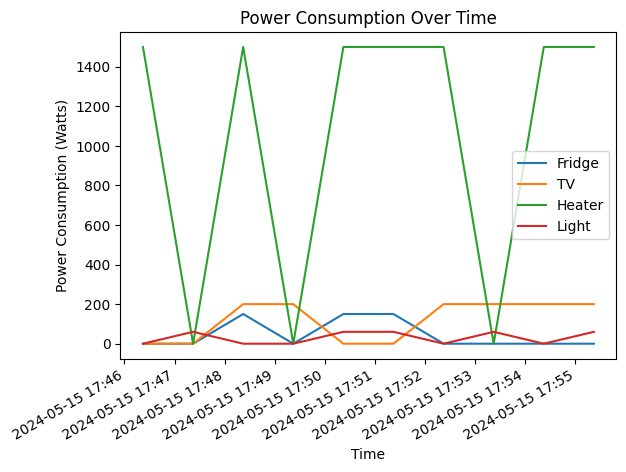

In [ ]:
# Assistant

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import random

class Appliance:
    def __init__(self, name, power_rating):
        self.name = name
        # The power consumption in watts
        self.power_rating = power_rating
        self.is_on = False
        # A list to store power consumption logs over time
        self.power_log = []

    # Turns the appliance on and prints a message
    def turn_on(self):
        self.is_on = True
        print(f"{self.name} is turned on.")

    # Turns the appliance off and prints a message
    def turn_off(self):
        self.is_on = False
        print(f"{self.name} is turned off.")

    def log_power_consumption(self, timestamp):
        power_consumption = self.power_rating if self.is_on else 0
        self.power_log.append((timestamp, power_consumption))

class SmartHome:
    def __init__(self, appliances):
        self.appliances = appliances

    def log_all_power_consumption(self, timestamp):
        for appliance in self.appliances:
            appliance.log_power_consumption(timestamp)

    # Creates a line chart to visualize power consumption over time
    def visualize_power_consumption(self):
        fig, ax = plt.subplots()

        for appliance in self.appliances:
            if appliance.power_log:
                timestamps, power_consumptions = zip(*appliance.power_log)
                ax.plot(timestamps, power_consumptions, label=appliance.name)

        # Format the x-axis for better time visibility
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
        # Rotate and align the date labels
        fig.autofmt_xdate()

        plt.xlabel('Time')
        plt.ylabel('Power Consumption (Watts)')
        plt.title('Power Consumption Over Time')
        plt.legend()
        plt.show()

def simulate_smart_home():
    # Create some appliances
    fridge = Appliance("Fridge", 150)
    tv = Appliance("TV", 200)
    heater = Appliance("Heater", 1500)
    light = Appliance("Light", 60)

    # Add appliances to smart home
    smart_home = SmartHome([fridge, tv, heater, light])

    # Simulate appliance usage
    start_time = datetime.now()
    for i in range(10):
        current_time = start_time + timedelta(minutes=i)
        for appliance in smart_home.appliances:
            if random.choice([True, False]):
                appliance.turn_on()
            else:
                appliance.turn_off()
            appliance.log_power_consumption(current_time)

    # Visualize the power consumption
    smart_home.visualize_power_consumption()

# Run the simulation
if __name__ == "__main__":
    simulate_smart_home()

**Assistant**

- **Code Review:**

  - **`visualize_power_consumption` Method:**
    - **Creating a Plot:**
      - A figure and axis are created using `plt.subplots()`.
    - **Plotting Data:**
      - For each appliance, if there are power logs, the timestamps and power consumptions are extracted and plotted.
    - **Formatting the X-axis:**
      - `ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))`: Formats the x-axis labels to display date and time.
      - `fig.autofmt_xdate()`: Rotates and aligns the date labels to prevent overlapping and improve readability.
    - **Adding Labels and Title:**
      - `plt.xlabel('Time')`: Sets the label for the x-axis.
      - `plt.ylabel('Power Consumption (Watts)')`: Sets the label for the y-axis.
      - `plt.title('Power Consumption Over Time')`: Sets the title of the plot.
      - `plt.legend()`: Adds a legend to the plot.
    - **Displaying the Plot:**
      - `plt.show()`: Displays the plot.

  - **Simulating the Smart Home:**
    - **Creating Appliances:** Instances of the `Appliance` class are created for a fridge, TV, heater, and light.
    - **Adding Appliances to Smart Home:** An instance of the `SmartHome` class is created with the appliances.
    - **Simulating Appliance Usage:**
      - The current time is recorded as the start time.
      - A loop runs for 10 iterations, each representing a minute.
      - For each appliance, a random choice is made to turn it on or off.
      - The power consumption is logged at the current time.
    - **Visualizing Power Consumption:**
      - After the simulation, the power consumption is visualized using the `visualize_power_consumption` method.

- **Additional Considerations:**

    - **Data Persistence and Retrieval:**
      - **Saving Logs to a Database or File:**
        - To ensure that power consumption data is not lost between sessions, implement functionality to save the power logs to a persistent storage solution, such as a database (e.g., SQLite, PostgreSQL) or a file (e.g., CSV, JSON). This allows for long-term analysis and retrieval of historical data for more comprehensive visualizations.

    - **Handling Time Zones and Daylight Saving Time (DST):**
      - **Ensuring Consistent Timestamps:**
        - When logging timestamps, consider the impact of time zones and daylight saving time changes. Use timezone-aware datetime objects to ensure that the timestamps are accurate and consistent, especially if the smart home system is used in different geographical locations.

These considerations ensure that the power consumption data is accurately logged, reliably stored, and correctly visualized, even in the presence of timezone differences or system restarts. This enhances the robustness and usability of the smart home energy management system.

**User**

Extend the smart home application to support scheduling. Implement a feature that allows users to schedule specific times for appliances to turn on or off and ensure the application respects these schedules while optimizing energy consumption.

**Assistant**

Imagine we want to extend the smart home application to allow users to schedule specific times for appliances to turn on or off. This feature will ensure that appliances operate according to the user's preferences while optimizing energy consumption. We'll implement a scheduling system using Python as below:

In [ ]:
# Assistant

from datetime import datetime, timedelta
import time

class Appliance:
    def __init__(self, name, power_rating):
        self.name = name
        self.power_rating = power_rating
        self.is_on = False
        self.schedule = []

    def turn_on(self):
        self.is_on = True
        print(f"{self.name} is turned on.")

    def turn_off(self):
        self.is_on = False
        print(f"{self.name} is turned off.")

    def get_power_consumption(self):
        return self.power_rating if self.is_on else 0

    def add_schedule(self, start_time, end_time):
        self.schedule.append((start_time, end_time))

    def check_schedule(self, current_time):
        for start_time, end_time in self.schedule:
            if start_time <= current_time <= end_time:
                self.turn_on()
                return
        self.turn_off()

class SmartHome:
    def __init__(self, appliances):
        self.appliances = appliances

    def get_total_power_consumption(self):
        total_power = sum(appliance.get_power_consumption() for appliance in self.appliances)
        print(f"Total power consumption: {total_power} watts")
        return total_power

    def optimize_energy_consumption(self):
        total_power = self.get_total_power_consumption()
        # Suppose we want to keep consumption under 1000 watts
        if total_power > 1000:
            for appliance in self.appliances:
                if appliance.is_on:
                    appliance.turn_off()
                    total_power -= appliance.get_power_consumption()
                    print(f"Reducing consumption: {total_power} watts left.")
                    if total_power <= 1000:
                        break

    def check_all_schedules(self, current_time):
        for appliance in self.appliances:
            appliance.check_schedule(current_time)

# Simulate sensor data and appliance control
def simulate_smart_home():
    # Create some appliances
    fridge = Appliance("Fridge", 150)
    tv = Appliance("TV", 200)
    heater = Appliance("Heater", 1500)
    light = Appliance("Light", 60)

    # Add appliances to smart home
    smart_home = SmartHome([fridge, tv, heater, light])

    # Add schedules
    current_time = datetime.now()
    fridge.add_schedule(current_time, current_time + timedelta(minutes=5))
    tv.add_schedule(current_time + timedelta(minutes=3), current_time + timedelta(minutes=8))

    # Simulate appliance usage
    for _ in range(10):
        current_time += timedelta(minutes=1)
        smart_home.check_all_schedules(current_time)
        smart_home.optimize_energy_consumption()
        time.sleep(2)

# Run the simulation
if __name__ == "__main__":
    simulate_smart_home()

Fridge is turned on.
TV is turned off.
Heater is turned off.
Light is turned off.
Total power consumption: 150 watts
Fridge is turned on.
TV is turned off.
Heater is turned off.
Light is turned off.
Total power consumption: 150 watts
Fridge is turned on.
TV is turned on.
Heater is turned off.
Light is turned off.
Total power consumption: 350 watts
Fridge is turned on.
TV is turned on.
Heater is turned off.
Light is turned off.
Total power consumption: 350 watts
Fridge is turned on.
TV is turned on.
Heater is turned off.
Light is turned off.
Total power consumption: 350 watts
Fridge is turned off.
TV is turned on.
Heater is turned off.
Light is turned off.
Total power consumption: 200 watts
Fridge is turned off.
TV is turned on.
Heater is turned off.
Light is turned off.
Total power consumption: 200 watts
Fridge is turned off.
TV is turned on.
Heater is turned off.
Light is turned off.
Total power consumption: 200 watts
Fridge is turned off.
TV is turned off.
Heater is turned off.
Light

**Assistant**

- **Code Review:**

    - **Extended Appliance Class:**
      - Added a `schedule` attribute to store the scheduled times for turning the appliance on or off and methods `add_schedule` and `check_schedule` to manage and check the schedule.
    - **Extended Smart Home Class:**
      - A `check_all_schedules` method was added to check and apply the schedule for all appliances.
    - **Simulation Function:**
      - Modified to include schedules for some appliances and check the schedule at regular intervals, ensuring appliances are turned on or off according to the schedule while optimizing energy consumption.

- **Additional Considerations:**

  - **User Interface for Scheduling:**
    - **Graphical User Interface (GUI) or Web Interface:**
      - Implement a user-friendly interface allowing users to set, modify easily, and view appliance schedules. This could be a GUI application using frameworks like Tkinter or PyQt, or a web application using frameworks like Flask or Django.
  
  - **Handling Edge Cases and Conflicts:**
    - **Conflicting Schedules:**
      - Implement logic to handle conflicting schedules where an appliance might be scheduled to turn on and off simultaneously or in overlapping periods. Provide clear feedback to users about conflicts and allow them to resolve these issues.

Addressing these additional considerations can enhance the functionality and usability of the smart home application, making it more robust and user-friendly for managing appliance schedules and optimizing energy consumption.